In [421]:
# import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import export_png
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from kaleido.scopes.plotly import PlotlyScope

In [422]:
# import forecasting library
import pyaf.ForecastEngine as autof

In [423]:

# Read in the data
df = pd.read_csv('data/CSUSHPINSA.csv')
df['DATE'] = df['DATE'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
# add a unique index column
df['index'] = range(0, len(df))
df.set_index('index', inplace=True)
# rename the 'CSUSHPINSA' column to 'Price Index'
df.rename(columns={'CSUSHPINSA': 'Price Index'}, inplace=True)
# remove the last row
df = df[:-1]
# convert the 'Price Index' column to a float
df['Price Index'] = df['Price Index'].astype(float)
df.head()


,DATE,Price Index
index,,
0,1987-01-01,63.734
1,1987-02-01,64.134
2,1987-03-01,64.469
3,1987-04-01,64.973
4,1987-05-01,65.547


In [424]:
# split the data into train and test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]
horizon = len(test)

In [425]:
train.shape

(422, 2)

In [426]:
test.shape

(12, 2)

In [427]:
# create a model
lEngine = autof.cForecastEngine()

In [428]:
# get the best model
lEngine.train(train, 'DATE' , 'Price Index' , horizon)

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Price Index'], 'Transformations': [('Price Index', 'None', '_', 'T+S+R'), ('Price Index', 'None', 'Diff_', 'T+S+R'), ('Price Index', 'None', 'RelDiff_', 'T+S+R'), ('Price Index', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.451, ('SIGNAL_TRAINING', {'Signals': ['Price Index'], 'Transformations': [('Price Index', 'None', '_', 'T+S+R'), ('Price Index', 'None', 'Diff_', 'T+S+R'), ('Price Index', 'None', 'RelDiff_', 'T+S+R'), ('Price Index', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['Price Index'], 'Transformations': [('Price Index', [('Price Index', 'None', 'CumSum_', 'T+S+R'), ('Price Index', 'None', 'Diff_', 'T+S+R'), ('Price Index', 'None', 'RelDiff_', 'T+S+R'), ('Price Index', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'Price Index', '

In [429]:
# review the model
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='DATE' TimeMin=1987-01-01T00:00:00.000000 TimeMax=2014-04-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Price Index' Length=422  Min=63.734 Max=287.284  Mean=134.700981 StdDev=51.94979
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Price Index' Min=0.0 Max=1.0  Mean=0.317455 StdDev=0.232386
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR' [Lag1Trend + NoCycle + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Price Index_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Price Index_Lag1Trend_residue_zeroCycle[0.0]' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0058 MAPE_Forecast=0.005 MAPE_Test=0.0151
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0058 SMAPE_

In [430]:
# review the model's performance
lEngine.mSignalDecomposition.mTrPerfDetails


,Split,Transformation,DecompositionType,Model,DetailedFormula,Category,Complexity,FitMAPE,ForecastMAPE,TestMAPE
0,None,CumSum_Price Index,T+S+R,CumSum_Price Index_Lag1Trend_residue_zeroCycle...,"(CumSum_Price Index, T+S+R, None, CumSum_Price...",Integration_Lag1Trend_NoCycle_AR,67.0,0.0036,0.0031,0.0058
1,None,_Price Index,T+S+R,_Price Index_Lag1Trend_residue_Seasonal_MonthO...,"(_Price Index, T+S+R, None, _Price Index_Lag1T...",NoTransf_Lag1Trend_Seasonal_MonthOfYear_AR,78.0,0.0045,0.0034,0.0136
2,None,_Price Index,T+S+R,_Price Index_Lag1Trend_residue_bestCycle_byMAP...,"(_Price Index, T+S+R, None, _Price Index_Lag1T...",NoTransf_Lag1Trend_Cycle_12_AR,78.0,0.0045,0.0034,0.0136
3,None,_Price Index,T+S+R,_Price Index_Lag1Trend_residue_Seasonal_MonthO...,"(_Price Index, T+S+R, None, _Price Index_Lag1T...",NoTransf_Lag1Trend_Seasonal_MonthOfYear_NoAR,14.0,0.0046,0.0036,0.0140
4,None,_Price Index,T+S+R,_Price Index_Lag1Trend_residue_bestCycle_byMAP...,"(_Price Index, T+S+R, None, _Price Index_Lag1T...",NoTransf_Lag1Trend_Cycle_12_NoAR,14.0,0.0046,0.0036,0.0140
...,...,...,...,...,...,...,...,...,...,...
91,None,RelDiff_Price Index,T+S+R,RelDiff_Price Index_ConstantTrend_residue_Seas...,"(RelDiff_Price Index, T+S+R, None, RelDiff_Pri...",RelativeDifference_ConstantTrend_Seasonal_Mont...,77.0,0.3822,0.6690,0.7615
92,None,RelDiff_Price Index,T+S+R,RelDiff_Price Index_LinearTrend_residue_Season...,"(RelDiff_Price Index, T+S+R, None, RelDiff_Pri...",RelativeDifference_LinearTrend_Seasonal_MonthO...,78.0,0.3822,0.6690,0.7615
93,None,RelDiff_Price Index,T+S+R,RelDiff_Price Index_Lag1Trend_residue_Seasonal...,"(RelDiff_Price Index, T+S+R, None, RelDiff_Pri...",RelativeDifference_Lag1Trend_Seasonal_MonthOfY...,79.0,0.3822,0.6690,0.7615
94,None,RelDiff_Price Index,T+S+R,RelDiff_Price Index_PolyTrend_residue_Seasonal...,"(RelDiff_Price Index, T+S+R, None, RelDiff_Pri...",RelativeDifference_PolyTrend_Seasonal_MonthOfY...,80.0,0.3822,0.6690,0.7615


In [432]:
# look at the forecast
forecast_df = lEngine.forecast(df, 12)
forecast_df['Price Index_Forecast'].tail(12)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Price Index'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.087, ('FORECASTING', {'Signals': ['Price Index'], 'Horizon': 12}))


434    293.39
435    293.39
436    293.39
437    293.39
438    293.39
439    293.39
440    293.39
441    293.39
442    293.39
443    293.39
444    293.39
445    293.39
Name: Price Index_Forecast, dtype: float64

In [433]:
# show the column names
forecast_df.columns

Index(['DATE', 'Price Index', 'row_number', 'DATE_Normalized', '_Price Index',
       '_Price Index_Lag1Trend', '_Price Index_Lag1Trend_residue',
       '_Price Index_Lag1Trend_residue_zeroCycle[0.0]',
       '_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue',
       '_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR',
       '_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR_residue',
       '_Price Index_Trend', '_Price Index_Trend_residue',
       '_Price Index_Cycle', '_Price Index_Cycle_residue', '_Price Index_AR',
       '_Price Index_AR_residue', '_Price Index_TransformedForecast',
       'Price Index_Forecast', '_Price Index_TransformedResidue',
       'Price Index_Residue', 'Price Index_Forecast_Lower_Bound',
       'Price Index_Forecast_Upper_Bound', 'Price Index_Forecast_Quantile_6',
       'Price Index_Forecast_Quantile_17', 'Price Index_Forecast_Quantile_28',
       'Price Index_Forecast_Quantile_39', 'Price Index_Forecast_Quantile_50',
       'Price

<AxesSubplot:xlabel='DATE'>

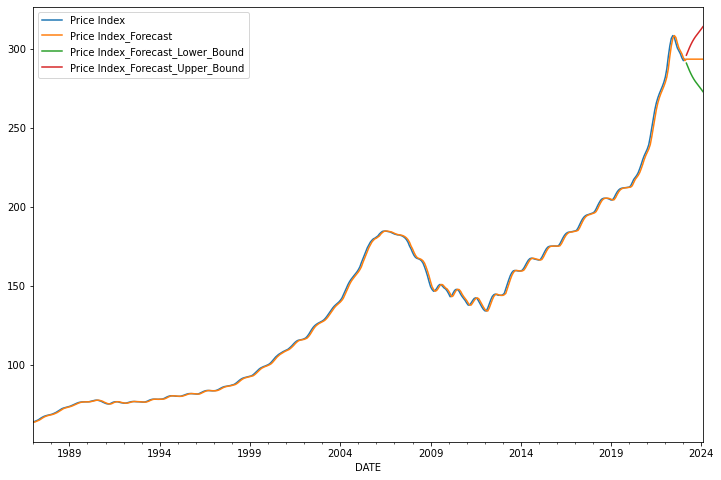

In [434]:
# acquire critical values and compare visually
forecast_df.plot.line('DATE', ['Price Index', 'Price Index_Forecast', 'Price Index_Forecast_Lower_Bound', 'Price Index_Forecast_Upper_Bound'], figsize=(12, 8))

In [435]:
# use the model to forecast into the future
future_df = lEngine.forecast(df, 12)
# show the forecast rows
future_df.tail(20)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Price Index'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.087, ('FORECASTING', {'Signals': ['Price Index'], 'Horizon': 12}))


,DATE,Price Index,row_number,DATE_Normalized,_Price Index,_Price Index_Lag1Trend,_Price Index_Lag1Trend_residue,_Price Index_Lag1Trend_residue_zeroCycle[0.0],_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue,_Price Index_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR,...,Price Index_Forecast_Upper_Bound,Price Index_Forecast_Quantile_6,Price Index_Forecast_Quantile_17,Price Index_Forecast_Quantile_28,Price Index_Forecast_Quantile_39,Price Index_Forecast_Quantile_50,Price Index_Forecast_Quantile_61,Price Index_Forecast_Quantile_72,Price Index_Forecast_Quantile_83,Price Index_Forecast_Quantile_94
426,2022-07-01,307.135,426,1.302753,1.088799,1.094162,-0.005363,0.0,-0.005363,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,2022-08-01,303.649,427,1.305868,1.073205,1.088799,-0.015594,0.0,-0.015594,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,2022-09-01,300.451,428,1.308983,1.058900,1.073205,-0.014306,0.0,-0.014306,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,2022-10-01,298.672,429,1.311998,1.050942,1.058900,-0.007958,0.0,-0.007958,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,2022-11-01,296.809,430,1.315113,1.042608,1.050942,-0.008334,0.0,-0.008334,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,2022-12-01,294.266,431,1.318127,1.031232,1.042608,-0.011376,0.0,-0.011376,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,2023-01-01,292.444,432,1.321242,1.023082,1.031232,-0.008150,0.0,-0.008150,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,2023-02-01,293.390,433,1.324357,1.027314,1.023082,0.004232,0.0,0.004232,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,2023-03-01,NaN,434,1.327170,NaN,1.027314,NaN,0.0,NaN,0.0,...,295.908404,291.25658,291.50701,291.76916,292.11230,292.5845,293.02382,293.16712,293.30191,293.60602
435,2023-04-01,NaN,435,1.330285,NaN,1.027314,NaN,0.0,NaN,0.0,...,298.301760,289.10894,289.78349,290.14052,290.85807,291.8205,292.53088,292.97880,293.23619,293.80402


In [436]:
future_df[['DATE', 'Price Index', 'Price Index_Forecast']].tail(20)


,DATE,Price Index,Price Index_Forecast
426,2022-07-01,307.135,308.334
427,2022-08-01,303.649,307.135
428,2022-09-01,300.451,303.649
429,2022-10-01,298.672,300.451
430,2022-11-01,296.809,298.672
431,2022-12-01,294.266,296.809
432,2023-01-01,292.444,294.266
433,2023-02-01,293.390,292.444
434,2023-03-01,NaN,293.390
435,2023-04-01,NaN,293.390


In [437]:
# add an additional 24 months of blank data to the original dataframe
df2 = df.append(pd.DataFrame({'DATE': pd.date_range(start='2023-04-01', periods=12, freq='MS')}))
df2['index'] = range(0, len(df2))
df2.set_index('index', inplace=True)
df2.shape


(446, 2)

In [438]:
forecast_df.shape

(446, 32)

In [439]:
# fill the price index forecast column with the forecast data
df2['Price Index_Forecast'] = future_df['Price Index_Forecast'].values
# for values after 2023-03-01, fill with NaN
for i in range(0, 11):
    df2['Price Index_Forecast'][len(df2)-11+i] = np.nan
    
# for values after 2023-03-01, fill with Price Index_Forecast
df2['Price Index_Forecast'].fillna(value=future_df['Price Index_Forecast'], inplace=True)

df2.tail(36)

,DATE,Price Index,Price Index_Forecast
index,,,
410,2021-03-01,244.264,239.265
411,2021-04-01,249.859,244.264
412,2021-05-01,255.484,249.859
413,2021-06-01,261.207,255.484
414,2021-07-01,265.542,261.207
415,2021-08-01,268.820,265.542
416,2021-09-01,271.477,268.820
417,2021-10-01,273.693,271.477
418,2021-11-01,276.070,273.693


In [441]:
# use plotly to chart the Price index and forecast
fig = px.line(forecast_df, x='DATE', y=['Price Index', 'Price Index_Forecast'])
# add upper and lower bounds
fig.add_scatter(x=forecast_df['DATE'], y=forecast_df['Price Index_Forecast_Upper_Bound'], name='Upper Bound')
fig.add_scatter(x=forecast_df['DATE'], y=forecast_df['Price Index_Forecast_Lower_Bound'], name='Lower Bound')
# zoom in on data after 2022
fig.update_xaxes(range=['2021-01-01', '2024-01-01'])
# add a title
fig.update_layout(title='U.S. Price Index Forecast')
# add a vertical line to show where the forecast begins
fig.add_vline(x='2022-04-01', line_width=3, line_dash='dash', line_color='red')
# save the chart as a png
fig.write_image('images/us_housing_price_forecast.png')
fig.show()